# PCA Analysis with CAC40
In this exploratory analysis, I applied Principal Component Analysis (PCA) on the historical price data of 30 CAC40 stocks over a 5-year period. The objective was to identify latent structures and reduce dimensionality while preserving most of the variance in the data.


## Objective 
- Understand common patterns among stocks through PCA

- Determine the optimal number of factors to retain

- Visualize contributions of each stock to the principal components

- Summarize key distributional characteristics (mean, volatility, skewness, kurtosis)

In [1]:
import numpy as np
import pandas as pd

# CAC40 stock tickers (30 examples)
tickers = [
    'AIR.PA', 'ALO.PA', 'OR.PA', 'BNP.PA', 'CAP.PA', 'CA.PA', 'ENGI.PA',
    'KER.PA', 'MC.PA', 'ML.PA', 'SAN.PA', 'SU.PA', 'SGO.PA', 'STM.PA',
    'UG.PA', 'VIE.PA', 'VIV.PA', 'ACA.PA', 'AI.PA', 'BN.PA', 'DSY.PA',
    'EL.PA', 'HO.PA', 'LR.PA', 'MT.AS', 'PUB.PA', 'RI.PA', 'RMS.PA',
    'SAF.PA', 'TTE.PA'
]

# Generate business days
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', end='2025-01-01', freq='B')

# Simulate prices with log-normal path (drift + random noise)
returns = 0.0005 + 0.01 * np.random.randn(len(dates), len(tickers))
prices = 100 * np.cumprod(1 + returns, axis=0)

# Create DataFrame
price_df = pd.DataFrame(prices, index=dates, columns=tickers)

price_df.to_excel("mock_CAC40.xlsx")
price_df.head()


,AIR.PA,ALO.PA,OR.PA,BNP.PA,CAP.PA,CA.PA,ENGI.PA,KER.PA,MC.PA,ML.PA,...,DSY.PA,EL.PA,HO.PA,LR.PA,MT.AS,PUB.PA,RI.PA,RMS.PA,SAF.PA,TTE.PA
2020-01-01,100.546714,99.911736,100.697689,101.573030,99.815847,99.815863,101.629213,100.817435,99.580526,100.592560,...,101.515649,99.824224,100.117528,98.625252,99.505617,100.160923,98.899006,100.425698,99.449361,99.758306
2020-01-02,99.991991,101.812335,100.734446,100.549467,100.686785,98.647175,101.892294,98.892154,98.307701,100.840884,...,101.895403,99.489730,99.489869,99.277832,100.581273,101.143782,98.118478,100.165382,99.828525,100.781373
2020-01-03,99.562851,101.674217,99.670353,99.396963,101.555234,100.034391,101.869867,99.934016,98.712371,100.240760,...,101.722515,99.894766,101.009969,98.812943,99.818370,100.686858,99.065716,100.544760,99.349588,101.349041
2020-01-06,99.709286,102.709917,99.020449,99.120975,101.207805,98.620390,102.222459,100.244866,98.766775,100.055729,...,99.821554,99.918227,101.121313,101.296352,99.676268,101.040820,99.080861,99.419988,100.534652,102.161793
2020-01-07,100.547873,101.827240,100.459013,97.781007,101.852355,100.829936,101.261020,99.727304,98.914581,99.602000,...,100.098518,101.274260,99.546365,101.534027,99.985147,101.881300,97.904820,98.156900,101.109652,102.516279


In [2]:
import sklearn as sk

# Pandas Version 
print(pd.__version__) # 0.25.1
# sklearn Version 
print(sk.__version__) # 0.19.1

2.2.3
1.4.2


In [3]:
# Import Data
X = pd.read_excel("/Users/duytuongtran/Downloads/Tony/CAC40/mock_CAC40.xlsx",sheet_name=0,header=0,index_col=0)

# Dimension 
print(X.shape)
# Number of observations 
n = X.shape[0] 
# Number of variables (features) 
k = X.shape[1] 
# Print dataset 
X

(1306, 30)


,AIR.PA,ALO.PA,OR.PA,BNP.PA,CAP.PA,CA.PA,ENGI.PA,KER.PA,MC.PA,ML.PA,...,DSY.PA,EL.PA,HO.PA,LR.PA,MT.AS,PUB.PA,RI.PA,RMS.PA,SAF.PA,TTE.PA
2020-01-01,100.546714,99.911736,100.697689,101.573030,99.815847,99.815863,101.629213,100.817435,99.580526,100.592560,...,101.515649,99.824224,100.117528,98.625252,99.505617,100.160923,98.899006,100.425698,99.449361,99.758306
2020-01-02,99.991991,101.812335,100.734446,100.549467,100.686785,98.647175,101.892294,98.892154,98.307701,100.840884,...,101.895403,99.489730,99.489869,99.277832,100.581273,101.143782,98.118478,100.165382,99.828525,100.781373
2020-01-03,99.562851,101.674217,99.670353,99.396963,101.555234,100.034391,101.869867,99.934016,98.712371,100.240760,...,101.722515,99.894766,101.009969,98.812943,99.818370,100.686858,99.065716,100.544760,99.349588,101.349041
2020-01-06,99.709286,102.709917,99.020449,99.120975,101.207805,98.620390,102.222459,100.244866,98.766775,100.055729,...,99.821554,99.918227,101.121313,101.296352,99.676268,101.040820,99.080861,99.419988,100.534652,102.161793
2020-01-07,100.547873,101.827240,100.459013,97.781007,101.852355,100.829936,101.261020,99.727304,98.914581,99.602000,...,100.098518,101.274260,99.546365,101.534027,99.985147,101.881300,97.904820,98.156900,101.109652,102.516279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,129.515671,201.041350,179.041252,155.500808,238.017703,162.214953,272.960462,170.445424,118.269543,192.877015,...,185.836980,118.909817,96.721851,91.529425,120.995430,180.955340,235.398972,136.307851,226.235369,174.249341
2024-12-27,128.399220,201.431327,181.064260,155.180390,236.389244,162.779053,274.340823,172.024704,120.541748,192.091444,...,185.960893,117.138512,95.753378,90.971091,122.953416,179.542577,235.385338,134.957635,224.591989,171.825518
2024-12-30,129.324082,198.861977,182.797065,155.984065,236.329197,164.390608,282.991341,172.932179,119.251879,195.047766,...,189.215827,116.274318,96.729197,90.750256,123.200699,179.781478,236.850402,135.740638,223.412443,172.125962
2024-12-31,126.369886,200.930487,185.984939,156.359406,232.651862,165.694139,280.971435,173.333928,120.128987,196.211129,...,188.260641,115.735571,95.825538,91.794367,124.516472,182.233720,236.523917,135.219926,225.319457,172.433057


In [4]:
print(np.mean(X,axis=0))
print(np.var(X,axis=0,ddof=0))

AIR.PA     117.322207
ALO.PA     143.718114
OR.PA      135.969356
BNP.PA     139.041991
CAP.PA     163.196491
CA.PA      121.576489
ENGI.PA    182.578304
KER.PA     141.718435
MC.PA      105.550751
ML.PA      149.735061
SAN.PA     164.951325
SU.PA      219.112363
SGO.PA     123.097875
STM.PA     134.143515
UG.PA      132.508585
VIE.PA     113.995735
VIV.PA     126.426584
ACA.PA     162.175705
AI.PA      138.627985
BN.PA      130.646573
DSY.PA     151.203043
EL.PA      117.026718
HO.PA       93.976070
LR.PA       90.560913
MT.AS      134.277663
PUB.PA     160.911556
RI.PA      176.037162
RMS.PA     105.063745
SAF.PA     157.129326
TTE.PA     169.358035
dtype: float64
AIR.PA      146.462054
ALO.PA     1147.271079
OR.PA      1451.735572
BNP.PA     1167.199801
CAP.PA     2780.129059
CA.PA       312.310320
ENGI.PA    3510.311662
KER.PA      476.862745
MC.PA        48.150518
ML.PA       734.908343
SAN.PA     1421.061083
SU.PA      6932.566299
SGO.PA       40.287106
STM.PA      989.245049
UG.

In [5]:
Total_inertia = sum(np.var(X, axis = 0))
Total_inertia

32453.93791679169

In [6]:
# Class for Standardisation
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

# Standardisation 
Z = sc.fit_transform(X) 
print(Z)

[[-1.38615796 -1.29331503 -0.92572552 ... -0.26776432 -1.41929375
  -4.21428848]
 [-1.43199468 -1.2372028  -0.9247608  ... -0.28279291 -1.40996391
  -4.15234144]
 [-1.46745448 -1.24128051 -0.95268855 ... -0.26089064 -1.42174882
  -4.1179689 ]
 ...
 [ 0.99171425  1.62803662  1.22902055 ...  1.77104249  1.63098599
   0.167599  ]
 [ 0.74760918  1.68910615  1.31268817 ...  1.74098068  1.67791067
   0.18619371]
 [ 0.76572776  1.54116988  1.35205643 ...  1.80224944  1.58986879
   0.09954968]]


In [7]:
# Check (mean and standard error)
print(np.mean(Z,axis=0))
print(np.std(Z,axis=0,ddof=0))

[ 4.35248230e-17  4.35248230e-16  3.91723407e-16  5.22297876e-16
 -8.70496460e-17  6.96397168e-16  5.22297876e-16  5.22297876e-16
  6.09347522e-16 -7.83446814e-16  3.48198584e-16  8.70496460e-17
 -2.23064718e-15  1.74099292e-16 -3.48198584e-16 -5.22297876e-16
 -3.48198584e-16 -8.70496460e-17  1.74099292e-16  8.26971637e-16
 -3.48198584e-16  3.48198584e-16 -8.70496460e-16  4.78773053e-16
 -6.09347522e-16 -3.48198584e-16  0.00000000e+00  1.17517022e-15
  1.74099292e-16 -4.57010642e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
Total_inertia = sum(np.var(Z, axis = 0))
Total_inertia

30.0

In [9]:
# Class for PCA
from sklearn.decomposition import PCA

# Renaming and parameter setting
pca = PCA(svd_solver='full') 
# Parameters
print(pca)

# Computation (normed-PCA)
coord = pca.fit_transform(Z)

# Check (ALternative)
pca_check = PCA().fit(Z)
#To get the first component
coord_check = pca_check.transform(Z)
print(coord_check)

# Number of principal component
print(pca.n_components_) 

# Correlation coefficient
print(np.corrcoef(Z[:,0],Z[:,1]))

print(np.corrcoef(coord[:,0],coord[:,1]))

PCA(svd_solver='full')
[[ 7.60641204e+00 -3.03248993e+00 -3.43087338e+00 ...  1.11035128e-01
  -4.68503215e-02  5.23939458e-02]
 [ 7.67906073e+00 -2.93990745e+00 -3.41920437e+00 ...  1.10367304e-01
  -4.41475384e-02  4.86942678e-03]
 [ 7.65829016e+00 -2.97325038e+00 -3.37499126e+00 ...  1.55915661e-01
  -7.46551990e-02  3.09977498e-03]
 ...
 [-7.19531724e+00 -2.42470238e+00 -1.35003073e+00 ... -6.74740204e-02
  -3.89682296e-02  1.08478566e-01]
 [-7.18743265e+00 -2.42042647e+00 -1.37733284e+00 ... -1.22043584e-01
  -2.09903469e-02  1.26058956e-01]
 [-7.19266053e+00 -2.53403677e+00 -1.41692797e+00 ... -1.27783657e-01
  -6.17629445e-02  1.32332425e-01]]
30
[[1.         0.82606761]
 [0.82606761 1.        ]]
[[1.00000000e+00 4.59776978e-17]
 [4.59776978e-17 1.00000000e+00]]


In [10]:
# Explained variance
print(pca.explained_variance_) 

# A correction is needed for computing eigenvalues
eigval = (n-1)/n*pca.explained_variance_ 
print(eigval)
print(np.var(coord, axis=0)) 

# SVD - Singular Value Decomposition)
print(pca.singular_values_**2/n)

# Proportion of Explained variance
print(pca.explained_variance_ratio_)

# Cumulative sum
print(np.cumsum(pca.explained_variance_ratio_))

[2.03446731e+01 2.82341145e+00 1.75119858e+00 1.35459191e+00
 8.87649379e-01 7.96096704e-01 4.11663659e-01 3.12445515e-01
 2.70622416e-01 1.95160176e-01 1.56253280e-01 1.35526136e-01
 9.00986405e-02 8.12416349e-02 6.91287958e-02 5.21968429e-02
 4.71189154e-02 4.47036068e-02 3.34665284e-02 3.13483262e-02
 2.66134262e-02 2.22684311e-02 1.89089863e-02 1.44948937e-02
 1.31775480e-02 1.11599249e-02 8.80824033e-03 7.81693244e-03
 6.12884400e-03 5.01563983e-03]
[2.03290953e+01 2.82124957e+00 1.74985769e+00 1.35355471e+00
 8.86969709e-01 7.95487135e-01 4.11348450e-01 3.12206277e-01
 2.70415201e-01 1.95010743e-01 1.56133638e-01 1.35422364e-01
 9.00296523e-02 8.11794284e-02 6.90758641e-02 5.21568760e-02
 4.70828366e-02 4.46693774e-02 3.34409032e-02 3.13243229e-02
 2.65930484e-02 2.22513803e-02 1.88945077e-02 1.44837950e-02
 1.31674580e-02 1.11513798e-02 8.80149589e-03 7.81094704e-03
 6.12415116e-03 5.01179937e-03]
[2.03290953e+01 2.82124957e+00 1.74985769e+00 1.35355471e+00
 8.86969709e-01 7.954

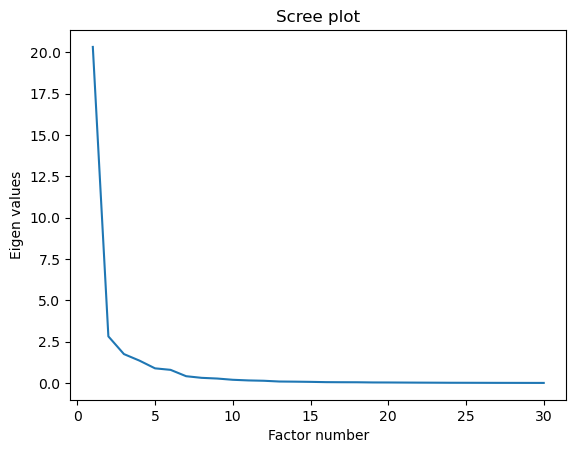

In [11]:
from matplotlib import pyplot as plt

# Scree plot 
plt.plot(np.arange(1,k+1),eigval) 
plt.title("Scree plot") 
plt.ylabel("Eigen values") 
plt.xlabel("Factor number") 
plt.show()

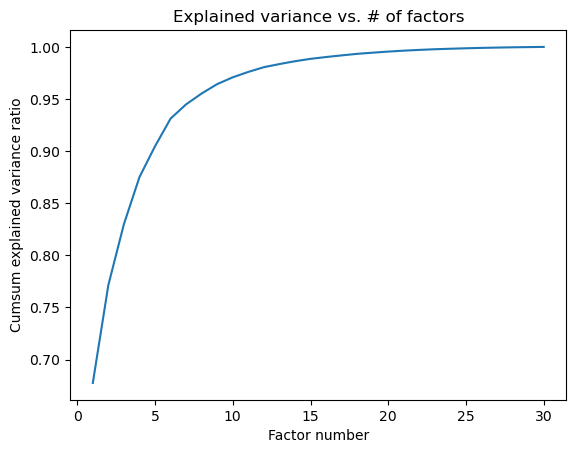

In [12]:
# Cumulative Explained Variance
plt.plot(np.arange(1,k+1),np.cumsum(pca.explained_variance_ratio_)) 
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.show()

## Scree Plot & Explained Variance

The scree plot and the cumulative explained variance curve indicate that:

- The first 5 principal components together explain over 90% of the total variance.

- PC1 alone explains ~67.8%, and PC2 adds ~8%, making the PC1–PC2 plane a meaningful projection for exploratory visualization.

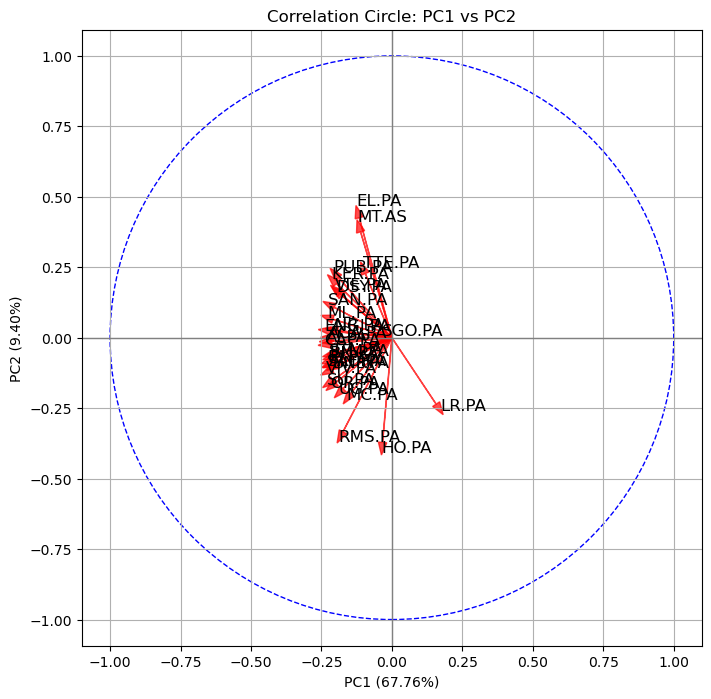

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loadings (weights of varibles on PC)
loadings = pca.components_.T  # shape: (num_variables, num_components)

# Correlation circle map PC1 and PC2
plt.figure(figsize=(8, 8))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Plot Variables
for i in range(len(X.columns)):
    plt.arrow(0, 0, 
              loadings[i, 0], loadings[i, 1], 
              color='r', alpha=0.7, head_width=0.03)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, 
             X.columns[i], fontsize=12)

plt.xlabel("PC1 (%.2f%%)" % (pca.explained_variance_ratio_[0]*100))
plt.ylabel("PC2 (%.2f%%)" % (pca.explained_variance_ratio_[1]*100))
plt.title("Correlation Circle: PC1 vs PC2")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()


## Correlation Circle (PC1 vs PC2)

The correlation circle shows how each stock contributes to the first two principal components:

- Most stocks are concentrated near the center, indicating moderate correlations with PC1 and PC2.

- A few stocks (e.g., LR.PA, HO.PA, RMS.PA) are positioned more distinctly, suggesting they behave somewhat differently from the bulk of the market.

- The tight clustering around PC1's axis reflects that PC1 captures a broad market-wide factor, possibly acting as a proxy for overall market movement.

In [14]:
from scipy.stats import skew, kurtosis

# Descriptive stats 
desc_stats = pd.DataFrame({
    'Mean': X.mean(),
    'Std Dev': X.std(),
    'Skewness': X.skew(),
    'Kurtosis': X.kurt()
})

desc_stats


,Mean,Std Dev,Skewness,Kurtosis
AIR.PA,117.322207,12.106787,-0.325803,-0.671143
ALO.PA,143.718114,33.884365,0.746128,0.006302
OR.PA,135.969356,38.116243,0.617079,-1.248402
BNP.PA,139.041991,34.177393,0.374412,-1.066407
CAP.PA,163.196491,52.747127,0.035254,-1.468725
CA.PA,121.576489,17.679073,0.284950,-1.085770
ENGI.PA,182.578304,59.270579,-0.103433,-1.581532
KER.PA,141.718435,21.845552,-0.362973,-1.169436
MC.PA,105.550751,6.941716,-0.087493,-0.711989
ML.PA,149.735061,27.119578,-0.305705,-1.041417


## Descriptive Statistics
For each stock, I calculated the following:

- Mean and Standard Deviation to assess central tendency and volatility

- Skewness to detect asymmetry in returns

- Kurtosis to assess the heaviness of tails

Key observations:

- Most stocks exhibit moderate to low skewness, indicating fairly symmetric return distributions.

- Some stocks show negative kurtosis (e.g., CAP.PA, KER.PA), suggesting flatter-than-normal distributions, while others like TTE.PA display high kurtosis, implying fat tails and potential for extreme returns.

## Reflections & Further Work
This PCA-based approach offers a compact and insightful way to analyze co-movements among stocks in a major equity index. While this study focused solely on price data, future work could be extended to include:

- Firm-level characteristics (e.g., market cap, sector, ESG score)

- Macroeconomic variables (e.g., interest rates, inflation)

- Temporal analysis of factor stability

Such enrichments would enable multivariate correlation studies and factor-based investment strategies with more granularity and interpretability.